<a href="https://colab.research.google.com/github/thakurritik870/Face-Detection/blob/master/SocialDistancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
Requirement already up-to-date: torch==1.5 in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision==0.6 in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)


In [2]:
!pip install cython pyyaml==5.1


     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=e4dde6c3e7e58e15cc5edd801a78f9a0621214c0583763dd33cade80a0a65274
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'


  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-x0etyxle
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-x0etyxle
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=267008 sha256=481185931b82a36ca4abdf9da9babf4f652c9ffe94dae7590fcd871cb9f6439a
  Stored in directory: /tmp/pip-ephem-wheel-cache-zapium5r/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing installation: pycocotools 2.0.0
    Uninstalling pycocotools-2.0.0:
      Successfully uninstalled pycocotools-2.0.0


torchvision


In [0]:
import torch, torchvision


In [5]:
print(torch.__version__, torch.cuda.is_available())


1.5.0+cu101 True


In [6]:
!gcc --version


gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



# install detectron2:


In [7]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html


Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html
     |████████████████████████████████| 6.2MB 663kB/s 
  Created wheel for fvcore: filename=fvcore-0.1.1.post200513-cp36-none-any.whl size=40893 sha256=b4d1ef36295177a422330e8ac2dc4a4797f94382df74c061c7decacee5ed6bc5
  Stored in directory: /root/.cache/pip/wheels/a2/f6/77/551770c4b8cd75e9335cd0acf59c08d60a8684048b19da6702
Successfully built fvcore


In [0]:
#import libaries

In [0]:
import detectron2


In [0]:
from detectron2.utils.logger import setup_logger


In [11]:
setup_logger()


<Logger detectron2 (DEBUG)>

In [0]:
# import some common libraries

In [0]:
import numpy as np

In [0]:
import cv2

In [0]:
import random

In [0]:
from google.colab.patches import cv2_imshow

In [0]:
import matplotlib.pyplot as plt

In [0]:
# import some common detectron2 utilities

In [0]:
from detectron2 import model_zoo


In [0]:
from detectron2.engine import DefaultPredictor

In [0]:
from detectron2.config import get_cfg

In [0]:
from detectron2.utils.visualizer import Visualizer


In [0]:
from detectron2.data import MetadataCatalog


In [0]:
#Reading a video

In [0]:
 %timeit 

In [26]:
!rm -r frames/*

rm: cannot remove 'frames/*': No such file or directory


In [0]:
!mkdir frames/

In [29]:
pwd

'/content'

In [30]:
cd frames

/content/frames


In [32]:
cd ..

/content


In [33]:
cd frames/

/content/frames


In [36]:
cd ..

/content


In [0]:
#specify path to video
video = "sample.mp4"

#capture video
cap = cv2.VideoCapture(video)
cnt=0

# Check if video file is opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

ret,first_frame = cap.read()

#Read until video is completed
while(cap.isOpened()):
    
  # Capture frame-by-frame
  ret, frame = cap.read()
     
  if ret == True:

    #save each frame to folder        
    cv2.imwrite('frames/'+str(cnt)+'.png', frame)
    cnt=cnt+1
    if(cnt==750):
      break

  # Break the loop
  else: 
    break

In [40]:
#frame rate of a video
FPS=cap.get(cv2.CAP_PROP_FPS)
print(FPS)

25.0


In [41]:
cfg = get_cfg()

# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9  # set threshold for this model

# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml")
predictor = DefaultPredictor(cfg)

model_final_f97cb7.pkl: 136MB [00:13, 10.4MB/s]                           


In [0]:
#read an image
img = cv2.imread("frames/30.png")

#pass to the model
outputs = predictor(img)

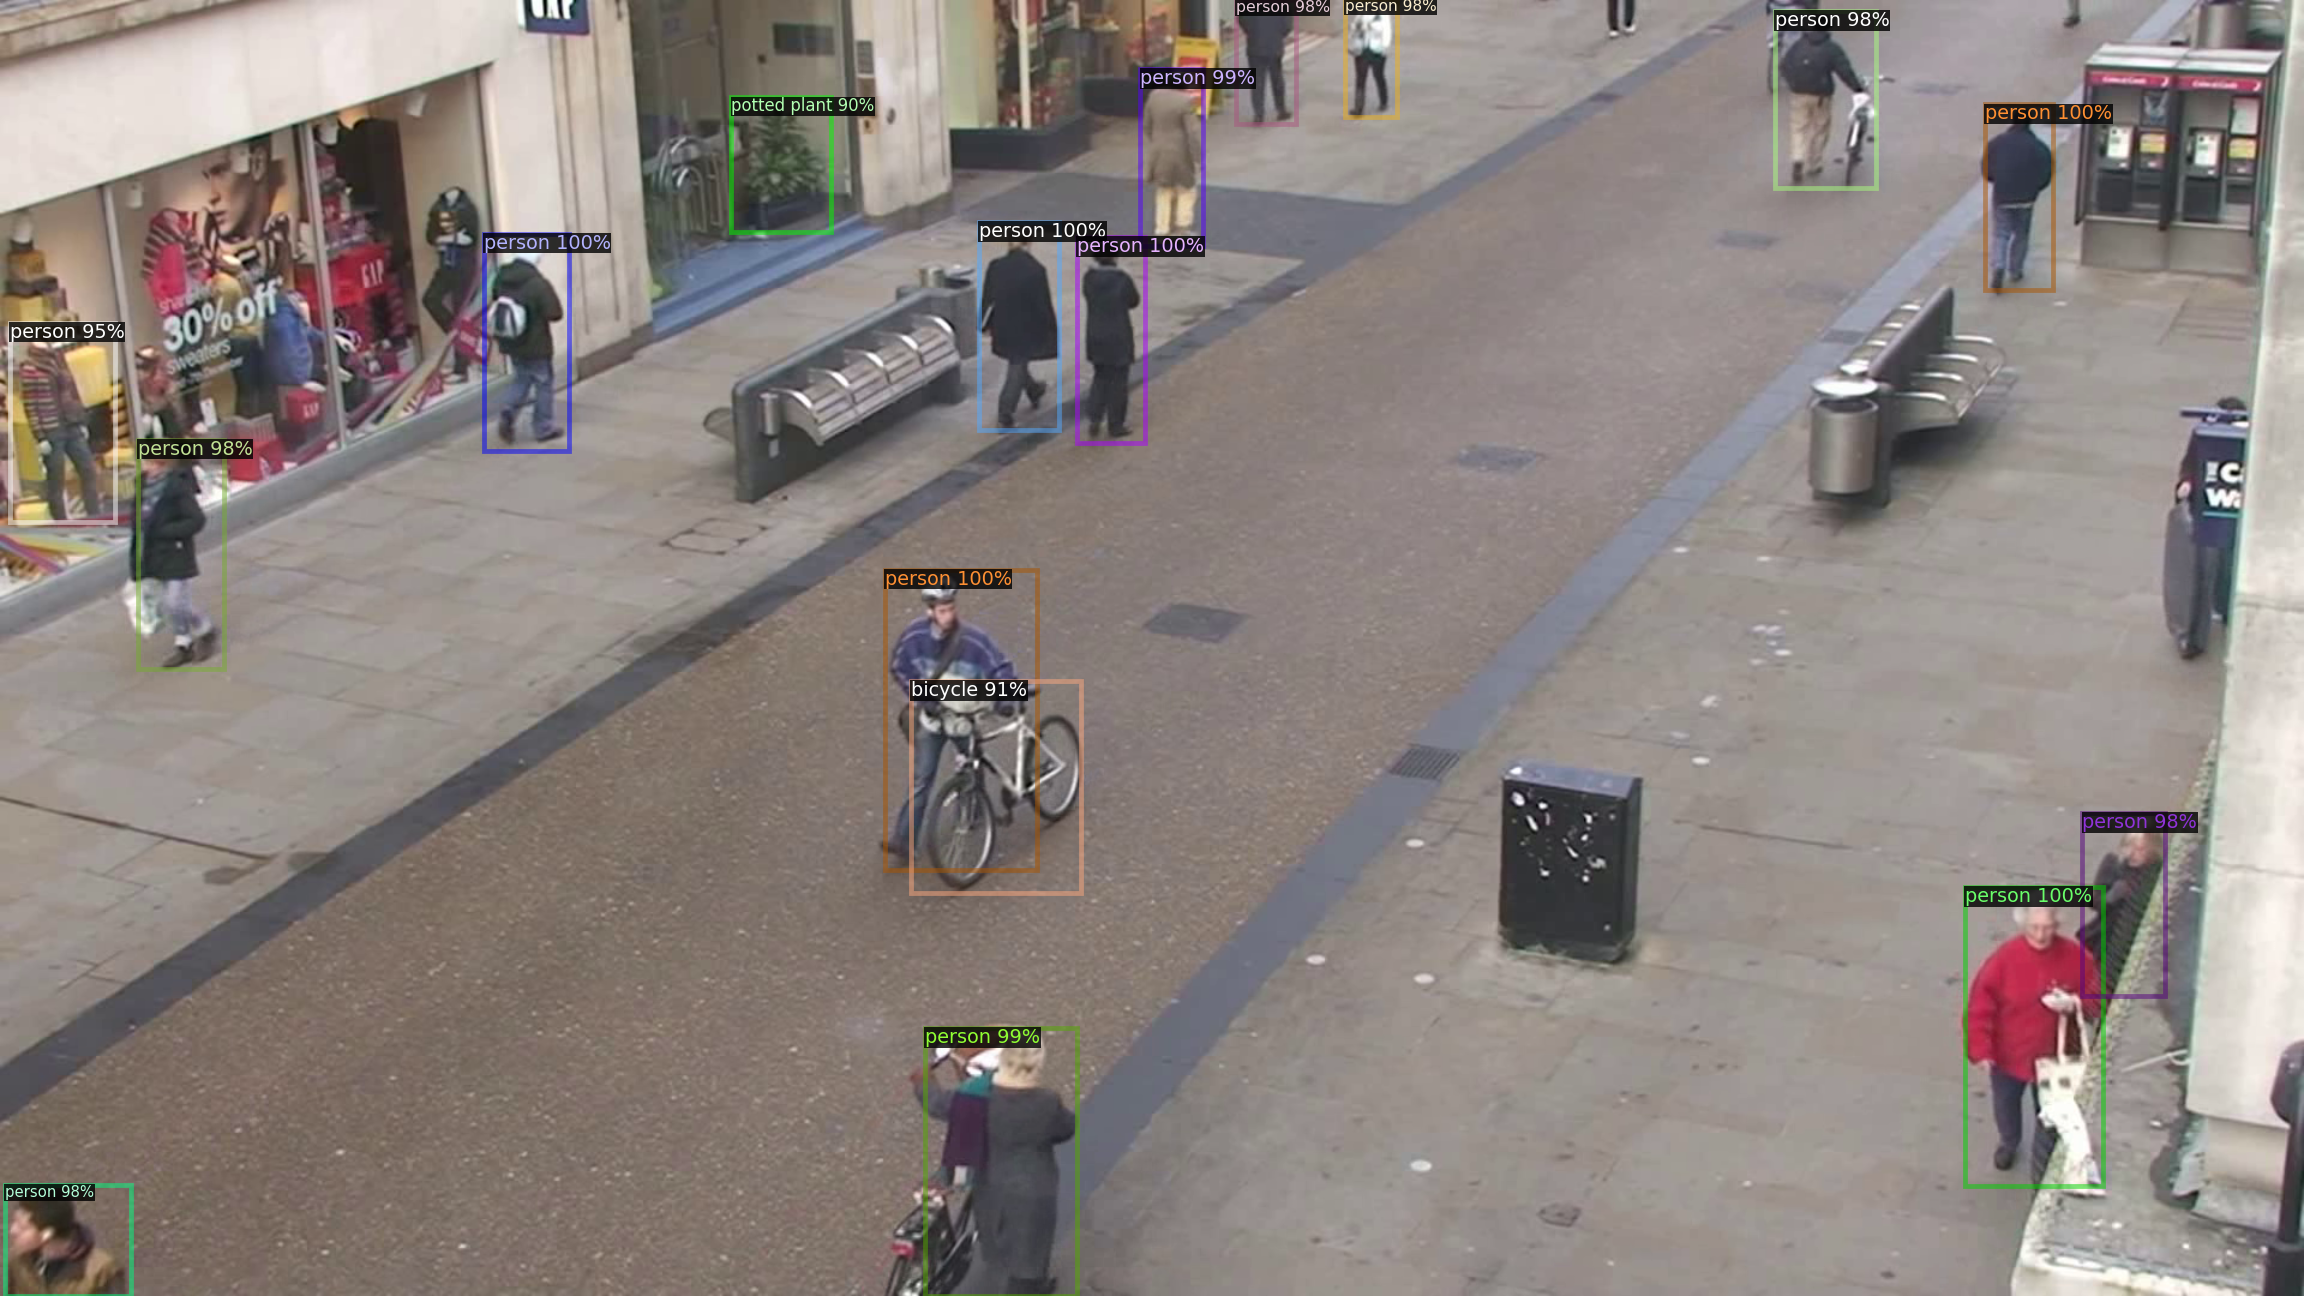

In [43]:
# Use `Visualizer` to draw the predictions on the image.
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [44]:
classes=outputs['instances'].pred_classes.cpu().numpy()
print(classes)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 58]


In [45]:
bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
print(bbox)

[[8.97625732e+02 1.98114746e+02 9.54295410e+02 3.69938965e+02]
 [8.15539734e+02 1.85776901e+02 8.82243225e+02 3.58775452e+02]
 [7.37155396e+02 4.75216461e+02 8.64526550e+02 7.25281311e+02]
 [1.63727197e+03 7.39270691e+02 1.75216077e+03 9.88613037e+02]
 [4.02958832e+02 1.95546738e+02 4.74301331e+02 3.76508423e+02]
 [1.65389941e+03 8.78322067e+01 1.71117517e+03 2.42416138e+02]
 [9.50240295e+02 5.83510170e+01 1.00226202e+03 2.05864594e+02]
 [7.70899780e+02 8.57066711e+02 8.97423645e+02 1.08000000e+03]
 [1.14824608e+02 3.66958679e+02 1.86961517e+02 5.57881104e+02]
 [3.88901186e+00 9.87568298e+02 1.09564430e+02 1.08000000e+03]
 [1.73523938e+03 6.77691223e+02 1.80430774e+03 8.29950134e+02]
 [1.12059485e+03 0.00000000e+00 1.16453687e+03 9.86647034e+01]
 [1.47889429e+03 1.01930275e+01 1.56364978e+03 1.57773270e+02]
 [1.02976807e+03 1.21370912e+00 1.07966443e+03 1.04322639e+02]
 [8.13119888e+00 2.69681549e+02 9.55819016e+01 4.35993988e+02]
 [7.59207336e+02 5.68076111e+02 9.01112183e+02 7.441908

In [0]:
#identity only persons 
ind = np.where(classes==0)[0]

#identify bounding box of only persons
person=bbox[ind]

#total no. of persons
num= len(person)

In [47]:
x1,y1,x2,y2 = person[0]
print(x1,y1,x2,y2)

897.62573 198.11475 954.2954 369.93896


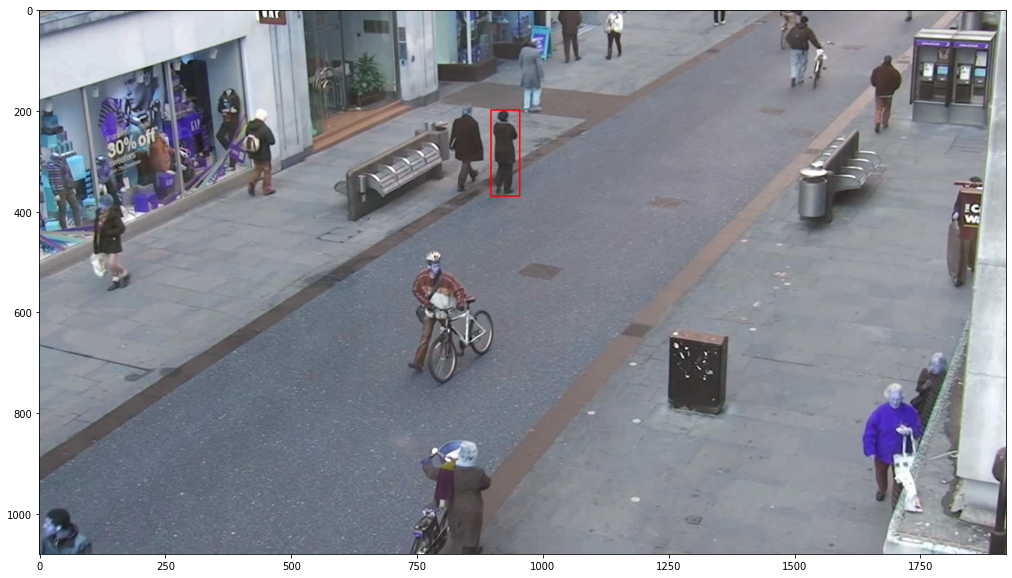

In [48]:
img = cv2.imread('frames/30.png')
_ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)

plt.figure(figsize=(20,10))
plt.imshow(img)

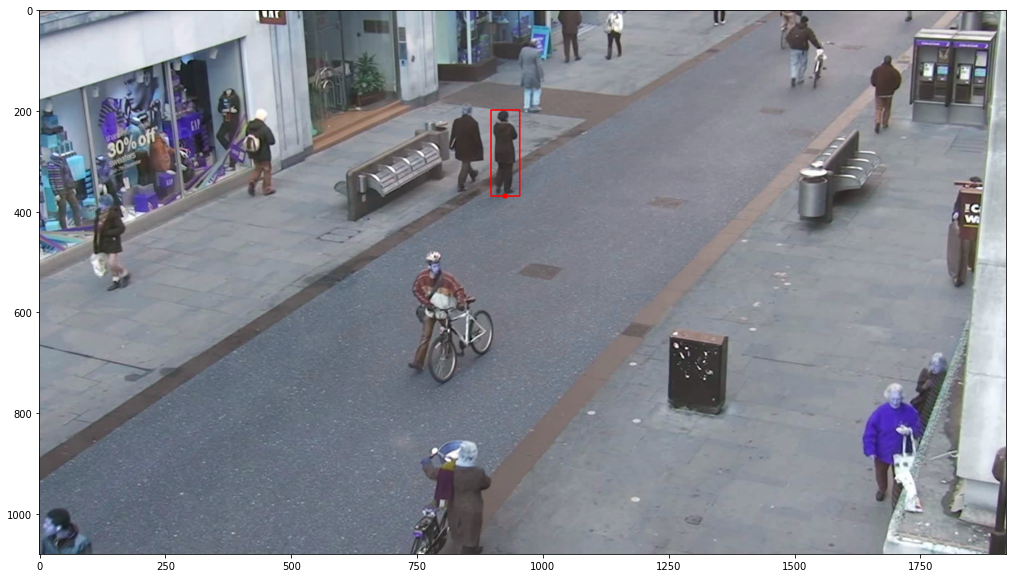

In [49]:
#compute center 
x_center = int((x1+x2)/2)
y_center = int(y2)

center = (x_center, y_center)

_ = cv2.circle(img, center, 5, (255, 0, 0), -1)
plt.figure(figsize=(20,10))
plt.imshow(img)

In [0]:
#define a function which return the bottom center of every bbox
def mid_point(img,person,idx):
  #get the coordinates
  x1,y1,x2,y2 = person[idx]
  _ = cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 2)
  
  #compute bottom center of bbox
  x_mid = int((x1+x2)/2)
  y_mid = int(y2)
  mid   = (x_mid,y_mid)
  
  _ = cv2.circle(img, mid, 5, (0, 0, 255), -1)
  cv2.putText(img, str(idx), mid, cv2.FONT_HERSHEY_SIMPLEX,1, (255, 255, 255), 2, cv2.LINE_AA)
  
  return mid

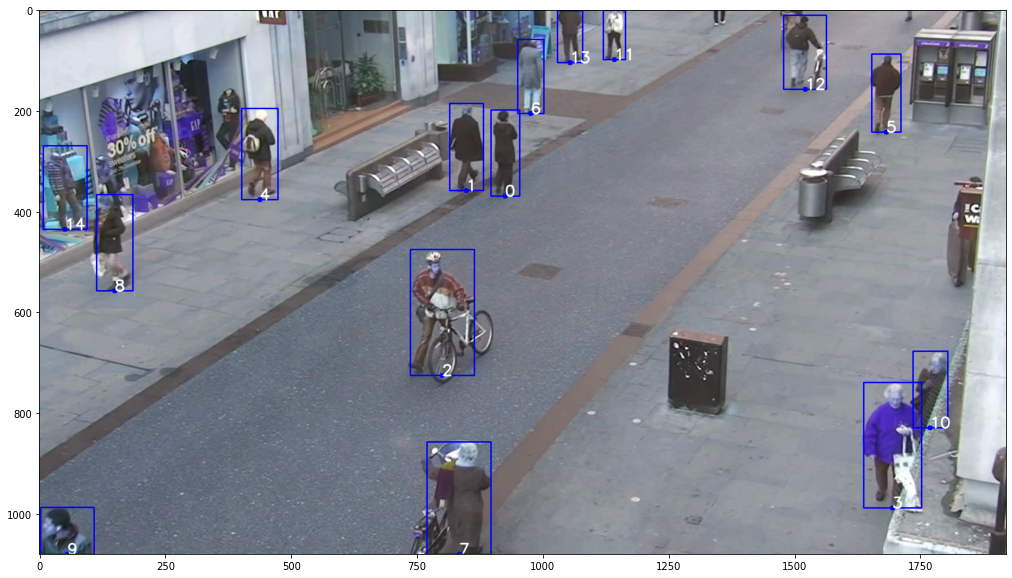

In [51]:
#call the function
midpoints = [mid_point(img,person,i) for i in range(len(person))]

#visualize image
plt.figure(figsize=(20,10))
plt.imshow(img)

In [52]:
%time
from scipy.spatial import distance
def compute_distance(midpoints,num):
  dist = np.zeros((num,num))
  for i in range(num):
    for j in range(i+1,num):
      if i!=j:
        dst = distance.euclidean(midpoints[i], midpoints[j])
        dist[i][j]=dst
  return dist

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


In [0]:
dist= compute_distance(midpoints,num)


In [54]:
%time
def find_closest(dist,num,thresh):
  p1=[]
  p2=[]
  d=[]
  for i in range(num):
    for j in range(i,num):
      if( (i!=j) & (dist[i][j]<=thresh)):
        p1.append(i)
        p2.append(j)
        d.append(dist[i][j])
  return p1,p2,d

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


In [55]:
import pandas as pd

thresh=100
p1,p2,d=find_closest(dist,num,thresh)
df = pd.DataFrame({"p1":p1,"p2":p2,"dist":d})
df

p1  p2       dist
0   0   1  77.781746
1  11  13  88.204308

In [0]:
def change_2_red(img,person,p1,p2):
  risky = np.unique(p1+p2)
  for i in risky:
    x1,y1,x2,y2 = person[i]
    _ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)  
  return img

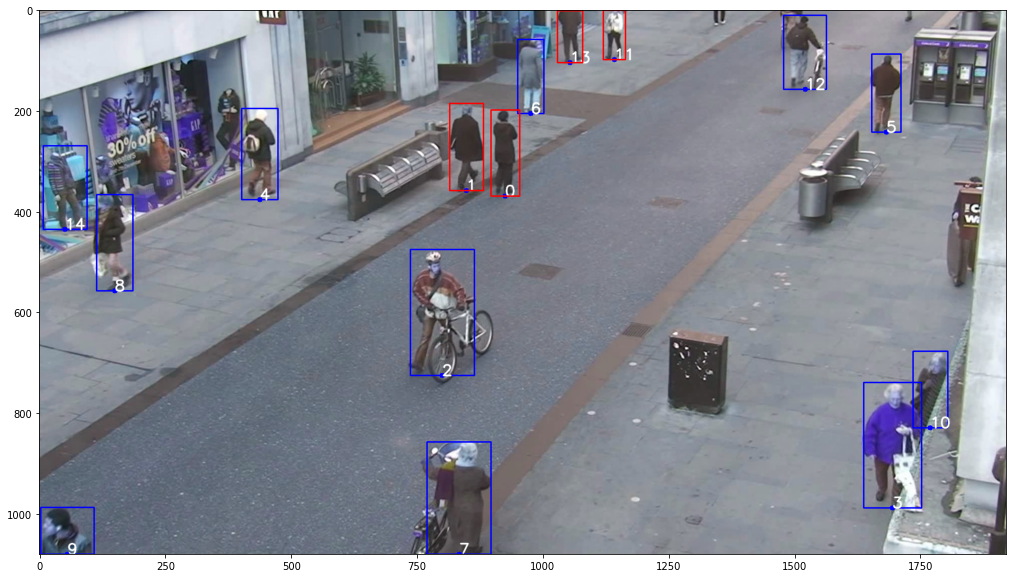

In [57]:
img = change_2_red(img,person,p1,p2)

plt.figure(figsize=(20,10))
plt.imshow(img)

In [0]:
import os
import re

names=os.listdir('frames/')
names.sort(key=lambda f: int(re.sub('\D', '', f)))

In [0]:
def find_closest_people(name,thresh):

  img = cv2.imread('frames/'+name)
  outputs = predictor(img)
  classes=outputs['instances'].pred_classes.cpu().numpy()
  bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
  ind = np.where(classes==0)[0]
  person=bbox[ind]
  midpoints = [mid_point(img,person,i) for i in range(len(person))]
  num = len(midpoints)
  dist= compute_distance(midpoints,num)
  p1,p2,d=find_closest(dist,num,thresh)
  img = change_2_red(img,person,p1,p2)
  cv2.imwrite('frames/'+name,img)
  return 0

In [60]:
from tqdm import tqdm
thresh=100
_ = [find_closest_people(names[i],thresh) for i in tqdm(range(len(names))) ]

100%|██████████| 750/750 [14:29<00:00,  1.16s/it]


In [61]:
%time
frames = os.listdir('frames/')
frames.sort(key=lambda f: int(re.sub('\D', '', f)))

frame_array=[]

for i in range(len(frames)):
    
    #reading each files
    img = cv2.imread('frames/'+frames[i])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)

out = cv2.VideoWriter('sample_output.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 25, size)
 
for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])
out.release()

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs
